# TwoStateMarkovChain examples

Created 2022-03-17 by Tom Loredo

This notebook demonstrates use of the `TwoStateMarkovChain` class in the `two_state_markov` module. The problems in Assignment06 use this class. *Don't just use the class blindly; make sure you understand how it works!*

We start with some familiar imports, as well as the `TwoStateMarkovChain` import:

In [1]:
from matplotlib.pyplot import *
from numpy import *
from scipy import stats

from two_state_markov import TwoStateMarkovChain

Two define a discrete-state Markov chain we need two main ingredients:
* A PMF for the initial state, $\{\pi_x\}$, giving the probabilities for choosing state $x$ as the intial state;
* A transition matrix $\mathbf{T}$, with elements $T_{yx}$, giving the probabilities for choosing $y$ for the next state, when the current state is $x$.
The transition matrix is a collection of PMFs for moving from the current state to the next, one such PMF for each possible value of the current state.  The PMFs are arranged as columns in the matrix.

We'll explore two-state Markov chains here.  We'll label the states as state 0 ("tails") and state 1 ("heads"), but the `TwoStateMarkovChain` class supports labeling them with anything that can be a Python dictionary key (e.g., any integer or string).

For a two-state Markov chain, the intial state PMF and each of the PMFs (columns) of $\mathbf{T}$ may be defined by a single (scalar) parameter, the probability for choosing one of the states. The probability for the other state is just 1 minus the first state's probability.  

For the transition matrix, we'll use the probabilties for jumping to a different state as the parameters (the transition probabilities), writing
$$
\mathbf{T} = 
\begin{bmatrix}
  1 - \alpha & \beta \\
  \alpha & 1-\beta
\end{bmatrix},
$$
where $\alpha$ is the probability for moving to state 1 from state 0, and $\beta$ is the probability for moving to state 0 from state 1 (note that Lec13 instead used the "staying" probabilities). With this parameterization, the equilibrium PMF is
\begin{align}
p_0 &= \frac{\beta}{\alpha + \beta},\\
p_1 &= \frac{\alpha}{\alpha + \beta}.\\
\end{align}
(Problem 1 in A06 asks you to prove this!)

Note that if we multiply both $\alpha$ and $\beta$ by some constant (keeping them both $\le 1$), $p_0$ and $p_1$ don't change. But of course the behavior of the chain will be very different.  You'll explore that in the assignment.

The initializer for the `TwoStateMarkovChain` takes $\alpha$ and $\beta$ for its parameters.  We'll experiment with a few choices here, exploring how the values affect how rapidly the marginal PMFs for the chain converge toward the equilibrium distribution.

In [2]:
alpha, beta = .07, .03
tsmc = TwoStateMarkovChain(alpha, beta)

`TwoStateMarkovChain` has two main methods for users:
* `sim_paths` simulates a number of sample paths from the chain, given a sampler for the initial state; the paths are stored in data attributes.
* `plot_evol` plots traceplots and marginal histograms depicting the behavior of stored sample paths.

The `help` function will pull show method docstrings here in the notebook, but we'll see that there are several other helper methods, used by these two methods:

In [3]:
help(TwoStateMarkovChain)

Help on class TwoStateMarkovChain in module two_state_markov:

class TwoStateMarkovChain(builtins.object)
 |  TwoStateMarkovChain(alpha, beta, states=(0, 1), l=None)
 |  
 |  A class for exploring the behavior of a 2-state Markov chain by
 |  generating multiple sample paths from it.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, alpha, beta, states=(0, 1), l=None)
 |      Define a 2-state Markov chain from its state-change probabilities.
 |      
 |      Parameters
 |      ----------
 |      
 |      alpha, beta : float
 |          Probabilities for changing state; `alpha` is the probability for
 |          changing from the first state to the second, `beta` is the
 |          probability for changing from the second to the first.
 |      
 |      states : 2-tuple
 |          Labels for the two states; default is to label the first state
 |          with the integer 0, and the second with 1.  The labels should
 |          be legitimate dict keys.
 |      
 |      l : int
 |   

Make sure you understand how the class works. Use the IPython kernel's `??` introspection to see the class's code in the notebook's help pop-up (or open up the module in a separate tab).

In [4]:
?? TwoStateMarkovChain

`sim_paths` requires a sampler for the initial state. Let's define two samplers:

In [5]:
# Deterministic (Kronecker delta) initial state distribution:
def init_at_0():
    """
    Initial state sampler returning state 0.
    """
    return 0


# Fair coin flip random initial state distribution:
init_half = stats.binom(1, .5).rvs

Set the number of paths to sample for each `sim_paths` call; by using a variable, we can change the number of paths in all of the plots below just by changing this setting.

In [6]:
n_paths = 20  # number of sample paths to generate

Depending on the properties of the chains you sample, and how many sample paths you simulate, you'll want to adjust properties of the plots to make sure the plots clearly communicate the behavior of the chain. Experiment with these parameters:
* `n_paths` (the `n` parameter for `sim_paths`) setting the number of paths to compute/display
* `alpha_trace` setting the transparency of the traces in the traceplot (lower alpha $=$ greater transparency; alpha is really an opacity parameter)
* `dither` setting how much to vertically dither each trace
As general rules:
* The more paths, the lower alpha_trace should be.
* With nonzero dither, less transparency is needed (alpha can be greater).

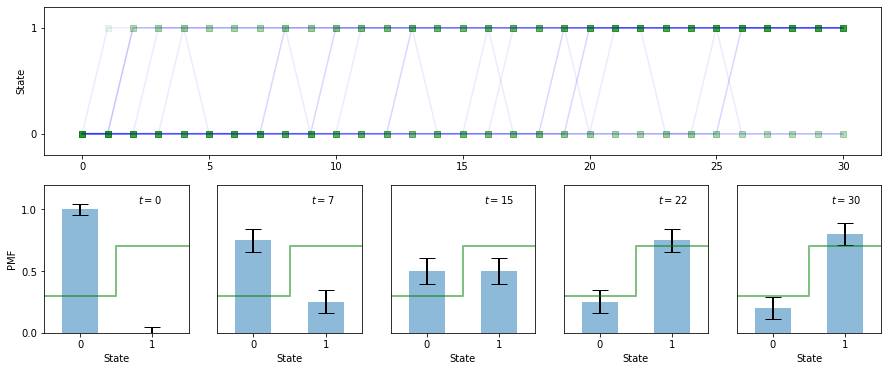

In [7]:
# Simulate paths of length 30, all starting at 0, with no dither.
tsmc.sim_paths(n_paths, init_at_0, 30)
# (Check what happens if we don't capture the returned fig
# instance in a variable!  Remember that a notebook code cell
# displays any value returned at the end of the cell.)
fig = tsmc.plot_evol(alpha_trace=.08, dither=0.)

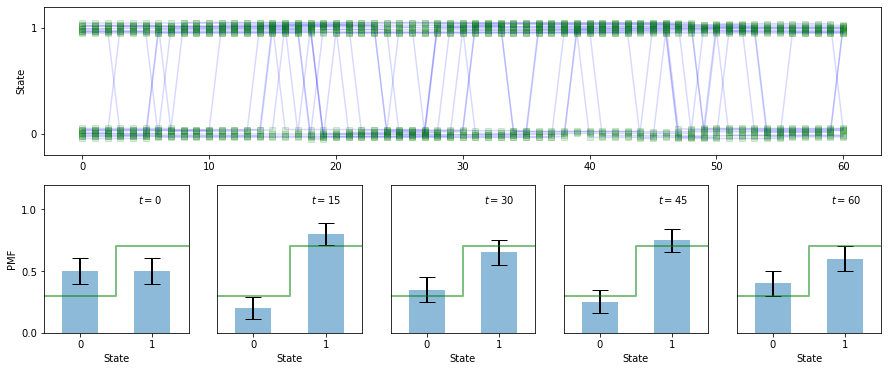

In [8]:
# Simulate paths of length 60, starting randomly (p = 1/2), dithered.
tsmc.sim_paths(n_paths, init_half, 60)
fig = tsmc.plot_evol(alpha_trace=.15, dither=.05)